In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

c:\Codes\Learning\Lang_graph\venv\Lib\site-packages\langchain_core\_api\deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [ ]:
#Defining State
class BMIState(TypedDict):
    weight: float  # in kilograms
    height: float  # in meters
    bmi: float     # Body Mass Index
    category: str  # BMI Category 

In [6]:
def calcuate_bmi(state: BMIState) -> BMIState:
    weight = state['weight']
    height = state['height']
    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi, 2)
    return state

In [14]:
def label_bmi_category(state: BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        category = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        category = 'Normal weight'
    elif 25 <= bmi < 29.9:
        category = 'Overweight'
    else:
        category = 'Obesity'
    state['category'] = category
    return state

In [ ]:
#define the graph
graph = StateGraph(BMIState)

# Add NODES to our graph
graph.add_node("Calculate BMI",calcuate_bmi)
graph.add_node("label BMI Category",label_bmi_category)

# Add edges to our graph
graph.add_edge(START, "Calculate BMI")
graph.add_edge("Calculate BMI", "label BMI Category")
graph.add_edge("label BMI Category", END)

#Compile the graph
workflow = graph.compile()



In [16]:
#Execute the graph
workflow.invoke({"weight": 70, "height": 1.75})

{'weight': 70, 'height': 1.75, 'bmi': 22.86, 'category': 'Normal weight'}

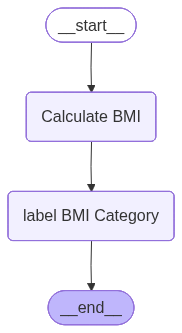

In [17]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [2]:
class CALC(TypedDict):
    a : int
    b : int
    c : int
    by_2 : bool
    by_3 : bool
    by_5 : bool
    by_7 : bool
    result : str

In [3]:
graph2 = StateGraph(CALC)

In [4]:
def add_numbers(state: CALC) -> CALC:
    state['c'] = state['a'] + state['b']
    return state

In [5]:
def by_2(state: CALC) -> CALC:
    state['by_2'] = (state['c'] % 2 == 0)
    return state

In [6]:
def by_3(state: CALC) -> CALC:
    state['by_3'] = (state['c'] % 3 == 0)
    return state

In [7]:
def grater_than_10(state: CALC) -> CALC:
    state['result'] = "Greater than 10" if state['c'] > 10 else "10 or less"
    return state

In [8]:
graph2.add_node("Add Numbers",add_numbers)
graph2.add_node("Check Divisible by 2",by_2)
graph2.add_node("Check Divisible by 3",by_3)  
graph2.add_node("Greater than 10?",grater_than_10)

In [9]:
graph2.add_edge(START, "Add Numbers")
graph2.add_edge("Add Numbers", "Check Divisible by 2")
graph2.add_edge("Add Numbers", "Check Divisible by 3")
graph2.add_edge("Check Divisible by 2", "Greater than 10?")
graph2.add_edge("Check Divisible by 3", "Greater than 10?")
graph2.add_edge("Greater than 10?", END)

In [13]:
workflow1 = graph2.compile()

In [20]:
from IPython.display import Image
from langchain_core.runnables.graph_mermaid import MermaidDrawMethod
Image(workflow1.get_graph().draw_mermaid_png(
    draw_method=MermaidDrawMethod.PYPPETEER
))

RuntimeError: asyncio.run() cannot be called from a running event loop